In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
import operator
import imblearn
from imblearn.under_sampling import NearMiss

import mysql.connector
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import auc, make_scorer
acc = make_scorer(accuracy_score)
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import seaborn as sns

In [2]:
import random

def sampleData(DataFrame, ratio):
    df_size = len(DataFrame.index)
    sample_size = int(round(ratio * df_size))
    if sample_size == df_size:
        sample_size = sample_size - 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    elif sample_size == 0:
        sample_size = 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    else:
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

When looking at the number of assays for each tissue, there is a strong imbalance in the classes. 

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

How will we deal with this class imbalance?

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

https://machinelearningmastery.com/multi-class-imbalanced-classification/

In [3]:
atlas = pd.read_csv('filtered_90_tissue_predictor_healthy_atlas_shotgun_nofluid.csv', sep=",")
atlas.head()

,A0A075B6H7,A0A075B6H8,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6K4,A0A075B6Q5,A0A087WSY6,A0A0A0MRZ7,A0A0A0MS14,...,Q9Y6U3,Q9Y6V0,Q9Y6W3,Q9Y6W5,Q9Y6X5,Q9Y6X8,Q9Y6X9,Q9Y6Y0,Q9Y6Y8,tissue_name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Brain


Lets check the number of samples for each tissue (the number of rows in the atlas corresponding to a tissue). This number impacts the predictor

In [4]:
tissue_counts = atlas['tissue_name'].value_counts()

In [5]:
tissue_counts

PBMC                162
Testis              133
Eye                 124
Dental plaque       116
Monocytes           103
Skin                100
Kidney               83
Pancreas             66
Liver                59
NK-cells             48
Cartilage            35
Brain                32
Tooth                31
B-cells              27
Parotid gland        20
Ovary                20
Palatine tonsils     20
Nasal polyps         20
Adipose tissue       14
Colon                14
Umbilical cord       14
Cervix               13
T-cells              12
Ureter               12
Skeletal muscle      12
Bone                 10
Heart                10
Esophagus             3
Lung                  3
Retina                3
Urinary bladder       3
Adrenal gland         3
Small intestine       3
Gall bladder          2
Placenta              2
Rectum                2
Prostate              2
Spinal cord           2
Name: tissue_name, dtype: int64

In [6]:
tissue_counts.mean()

35.21052631578947

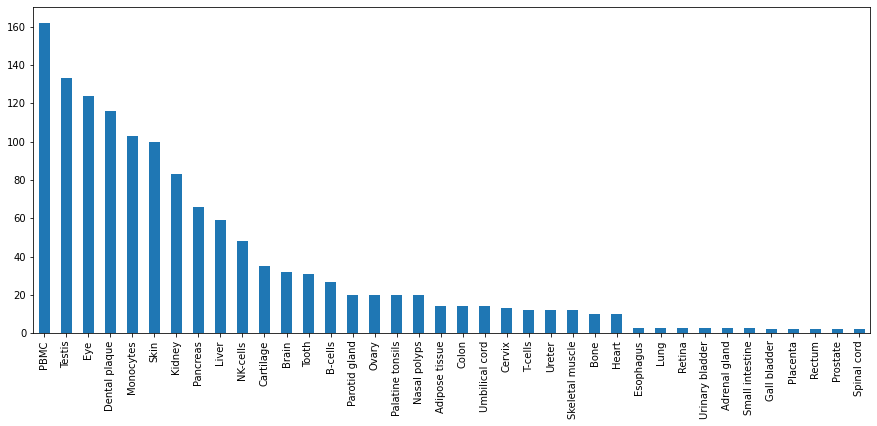

In [7]:
 figure(figsize=(15,6))
 atlas['tissue_name'].value_counts().plot(kind='bar')

# Undersampling of the majority class

## Imblearn RandomUnderSamples
Does not work for multiclass classifications

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=tf) #number of examples in the minority class divided by the number of examples in the majority class ==> 1/0.01=100

In [ ]:
tf = dict(Counter(atlas['tissue_name']))
tf = sorted(tf.items(), key=operator.itemgetter(1), reverse=True)
tf = dict(tf)

In [ ]:
tf['Blood'] = 150

In [ ]:
atlas_c = atlas.copy(deep=True)
y = atlas_c.pop('tissue_name')
X = atlas_c

In [ ]:
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
atlas_under = X_under
atlas_under['tissue_name'] = y_under
atlas_under.head()

In [ ]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()

tissues = atlas_under['tissue_name'].unique()
DataFrameDict = {elem : pd.DataFrame for elem in tissues}
for key in DataFrameDict.keys():
    DataFrameDict[key] = atlas_under[:][atlas_under['tissue_name'] == key]

for key in DataFrameDict.keys():
    train = sampleData(DataFrameDict[key], 0.85)
    train_df = train_df.append(train)

    test = DataFrameDict[key].drop(train.index)
    test_df = test_df.append(test)

y_train_under = train_df.pop('tissue_name').values
X_train_under = train_df.values
y_test_under = test_df.pop('tissue_name').values
X_test_under = test_df.values

In [ ]:
import csv
with open('protein_names.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(list(atlas_under.columns[:-1]))

In [ ]:
forest_random_undersampled = RandomForestClassifier(random_state=0, oob_score=True)
forest_random_undersampled.fit(X_train_under, y_train_under)
baseline_predictions =  forest_random_undersampled.predict(X_test_under)
print(f1_score(y_test_under, baseline_predictions, average="weighted"))
print(accuracy_score(y_test_under, baseline_predictions))
print(forest_random_undersampled.oob_score_)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_under = gnb.fit(X_train_under, y_train_under).predict(X_test_under)
print(f1_score(y_test_under, y_pred_under, average="weighted"))
print(accuracy_score(y_test_under, y_pred_under))

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
clf = XGBClassifier()
y_pred_under = clf.fit(X_train_under, y_train_under).predict(X_test_under)
print(f1_score(y_test_under, y_pred_under, average="weighted"))
print(accuracy_score(y_test_under, y_pred_under))

In [ ]:
import pickle
file_name = 'rf_undersampled_baseline.pkl'

# save
pickle.dump(forest_random_undersampled, open(file_name, "wb"))

## Imblearn AllKNN strategy
Uses nearest neighbour apporach. Removes inputs from the majority class that look like a minority class to make the classes more separatable

In [ ]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN(sampling_strategy='majority') #majority: only resample the majority class
X_alknn, y_allknn = allknn.fit_resample(X,y)

In [ ]:
y_allknn.value_counts().iloc[0] # so this removed only79 blood samples...

In [ ]:
for i in range(1,21):
    allknn = AllKNN(sampling_strategy='majority', n_neighbors=i)
    X_alknn, y_allknn = allknn.fit_resample(X,y)
    blood_count = int(y_allknn.value_counts().iloc[0])
    removal = 1067 - blood_count
    print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

## Near Miss Undersampling
Select examples based on the distance of the majority class to the minority class

NearMiss-1: majority examples with the smallest average distance to the 3 closest minority examples <br>
NearMiss-2: majority examples with the smallest average distance to the 3 furthest minority examples<br>
NearMiss-3: select majority example for each minority example that are the closest

Distance measured in euclidean distance

In [ ]:
from imblearn.under_sampling import NearMiss

### NearMiss-1

In [ ]:
for i in range(1,3): # numer of neighbors must be smaller or equal to the number of samples in the minority class which is 2 in our case
    misslearn1 = NearMiss(sampling_strategy='majority',version=1, n_neighbors=i)
    X_ml1, y_ml1 = misslearn1.fit_resample(X,y)
    blood_count = int(y_ml1.value_counts().iloc[0])
    removal = 1067 - blood_count
    print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

This approach brings it immediatly down to the minority class number



### NearMiss-2

In [ ]:
for i in range(1,3): # numer of neighbors must be smaller or equal to the number of samples in the minority class which is 2 in our case
    misslearn1 = NearMiss(sampling_strategy='majority',version=2, n_neighbors=i)
    X_ml1, y_ml1 = misslearn1.fit_resample(X,y)
    blood_count = int(y_ml1.value_counts().iloc[0])
    removal = 1067 - blood_count
    print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

Same as previously

### NearMiss-3

Doesn't even work

In [ ]:
misslearn1 = NearMiss(sampling_strategy='majority',version=3, n_neighbors=1)
X_ml1, y_ml1 = misslearn1.fit_resample(X,y)
blood_count = int(y_ml1.value_counts().iloc[0])
removal = 1067 - blood_count
print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

The NearMiss approaches are not suitable for our goal
<br>
<br>
<br>
## Condensed Nearest Neighbor Rule undersampling

This uses the KNN algorithm

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
for i in range(1,11):
    cnn = CondensedNearestNeighbour(sampling_strategy='majority',n_neighbors=i)
    X_cnn, y_cnn = cnn.fit_resample(X, y)
    blood_count = int(y_cnn.value_counts().iloc[0])
    removal = 1067 - blood_count
    print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

## Tomek links
The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors. If the examples in the minority class are held constant, the procedure can be used to find all of those examples in the majority class that are closest to the minority class, then removed. These would be the ambiguous examples.

In [ ]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks(sampling_strategy='majority')
X_tomek, y_tomek = tomek.fit_resample(X, y)
blood_count = int(y_tomek.value_counts().iloc[0])
removal = 1067 - blood_count
print('blood samples: {}, removed samples: {}'.format(blood_count, removal))

## Edited Nearest Neighbors


In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours
for i in range(1,21):
    enn = EditedNearestNeighbours(sampling_strategy='majority',n_neighbors=i)
    X_enn, y_enn = enn.fit_resample(X, y)
    blood_count = int(y_enn.value_counts().iloc[0])
    removal = 1067 - blood_count
    print('nearest neighbours: {}, blood samples: {}, removed samples: {}'.format(i, blood_count, removal))

# Oversampling

In [8]:
oversampling_atlas_sizes = pd.DataFrame(columns=['method', 'atlas_name','shape'])
oversampling_atlas_sizes.loc[len(oversampling_atlas_sizes)] = ['Baseline','atlas', atlas.shape]

## SMOTE

In [9]:
atlas_copy = atlas.copy(deep=True)
y = atlas_copy.pop('tissue_name')
X = atlas_copy

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=1)
X_smote, y_smote = oversample.fit_resample(X, y)

In [11]:
atlas_smote = X_smote
atlas_smote['tissue_name'] = y_smote
oversampling_atlas_sizes.loc[len(oversampling_atlas_sizes)] = ['SMOTE', 'atlas_smote', atlas_smote.shape]

## Random Oversampling

In [12]:
from imblearn.over_sampling import RandomOverSampler
oversample_minority = RandomOverSampler(sampling_strategy='minority', random_state=42)
oversample_not_majority = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_over_minority, y_over_minority = oversample_minority.fit_resample(X, y)
X_over_not_majority, y_over_not_majority = oversample_not_majority.fit_resample(X, y)
atlas_minority = X_over_minority
atlas_minority['tissue_name'] = y_over_minority
atlas_not_majority = X_over_not_majority
atlas_not_majority['tissue_name'] = y_over_not_majority

oversampling_atlas_sizes.loc[len(oversampling_atlas_sizes)] = ['Random Oversampling minority', 'atlas_minority', atlas_minority.shape]
oversampling_atlas_sizes.loc[len(oversampling_atlas_sizes)] = ['Random Oversampling not majority', 'atlas_not_majority', atlas_not_majority.shape]

## Drop minority classes

In [13]:
tissue_counts = atlas['tissue_name'].value_counts().to_frame()
low_tissues = tissue_counts.index[tissue_counts['tissue_name']<3].tolist()
atlas_dropped = atlas[~atlas['tissue_name'].isin(low_tissues)]
oversampling_atlas_sizes.loc[len(oversampling_atlas_sizes)] = ['Dropped low abundant samples', 'atlas_dropped', atlas_dropped.shape]

In [14]:
oversampling_atlas_sizes

,method,atlas_name,shape
0,Baseline,atlas,"(1338, 4982)"
1,SMOTE,atlas_smote,"(6156, 4982)"
2,Random Oversampling minority,atlas_minority,"(1498, 4982)"
3,Random Oversampling not majority,atlas_not_majority,"(6156, 4982)"
4,Dropped low abundant samples,atlas_dropped,"(1328, 4982)"


### Compare performances in RF

In [15]:
import random

def sampleData(DataFrame, ratio):
    df_size = len(DataFrame.index)
    sample_size = int(round(ratio * df_size))
    if sample_size == df_size:
        sample_size = sample_size - 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    elif sample_size == 0:
        sample_size = 1
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

    else:
        indexes = random.sample(range(df_size), sample_size)
        sample = DataFrame.iloc[indexes, : ]
        return sample

In [16]:
# Define a function that compares the CV perfromance of a set of predetrmined models 
#https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d
def cv_comparison(model, name, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_scores = pd.DataFrame()
    accs = []
    f1s = []
    precs = []
    recs = []
    f1s_w = []
    precs_w = []
    recs_w = []

    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    start = time.time()
    acc = np.round(cross_val_score(model, X, y, scoring='accuracy', cv=cv), 4)
    accs.append(acc)
    acc_avg = round(np.mean(acc[~np.isnan(acc)]), 4)
    f1 = np.round(cross_val_score(model, X, y, scoring='f1_macro', cv=cv), 4)
    f1s.append(f1)
    f1_avg = round(np.mean(f1[~np.isnan(f1)]), 4)
    prec = np.round(cross_val_score(model, X, y, scoring='precision_macro', cv=cv), 4)
    precs.append(prec)        
    prec_avg = round(np.mean(prec[~np.isnan(prec)]), 4)
    rec = np.round(cross_val_score(model, X, y, scoring='recall_macro', cv=cv), 4)
    recs.append(rec)        
    rec_avg = round(np.mean(rec[~np.isnan(rec)]), 4)

    f1_w = np.round(cross_val_score(model, X, y, scoring='f1_weighted', cv=cv), 4)
    f1s_w.append(f1_w)
    f1_w_avg = round(np.mean(f1_w[~np.isnan(f1_w)]), 4)
    prec_w = np.round(cross_val_score(model, X, y, scoring='precision_weighted', cv=cv), 4)
    precs_w.append(prec_w)        
    prec_w_avg = round(np.mean(prec_w[~np.isnan(prec_w)]), 4)
    rec_w = np.round(cross_val_score(model, X, y, scoring='recall_weighted', cv=cv), 4)
    recs_w.append(rec_w)        
    rec_w_avg = round(np.mean(rec_w[~np.isnan(rec_w)]), 4)
    cv_scores[str(name)] = [acc_avg, f1_avg, prec_avg, rec_avg, f1_w_avg, prec_w_avg, rec_w_avg]
    #oob = model.oob_score_
    print(name)
    print(time.time() - start)
    cv_scores.index = ['Accuracy', 'f1_macro', 'precision_macro', 'recall_macro', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    return cv_scores,accs, f1s, precs, recs, f1s_w, precs_w, recs_w,

In [17]:
atlases_names = ['atlas', 'atlas_smote', 'atlas_minority', 'atlas_not_majority', 'atlas_dropped']
atlases = [atlas, atlas_smote, atlas_minority, atlas_not_majority, atlas_dropped]

In [25]:
resultdf = pd.DataFrame()
from sklearn.model_selection import RepeatedStratifiedKFold
import time
from sklearn.model_selection import cross_val_score

for atlas_over, name in zip(atlases, atlases_names):
    train_df = pd.DataFrame()
    test_df = pd.DataFrame()

    tissues = atlas_over['tissue_name'].unique()
    DataFrameDict = {elem : pd.DataFrame for elem in tissues}
    for key in DataFrameDict.keys():
        DataFrameDict[key] = atlas_over[:][atlas_over['tissue_name'] == key]

    for key in DataFrameDict.keys():
        train = sampleData(DataFrameDict[key], 0.85)
        train_df = train_df.append(train)

        test = DataFrameDict[key].drop(train.index)
        test_df = test_df.append(test)

    y_train_over = train_df.pop('tissue_name').values
    X_train_over = train_df.values
    y_test_over = test_df.pop('tissue_name').values
    X_test_over = test_df.values

    # Build a forest and compute the feature importances
    forest = RandomForestClassifier(random_state=0, oob_score=True)
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)
    comp, accs, f1s, precs, recs, f1s_w, precs_w, recs_w = cv_comparison(forest, name, X_train_over, y_train_over, cv=4)
    print(name,accs, f1s, precs, recs, f1s_w, precs_w, recs_w )
    resultdf.append(comp)

/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

48.93251085281372
atlas [array([0.9399, 0.9717, 0.9787, 0.961 ])] [array([0.759 , 0.8875, 0.9136, 0.8337])] [array([0.7583, 0.915 , 0.9179, 0.842 ])] [array([0.7658, 0.8812, 0.9136, 0.8404])] [array([0.9252, 0.9664, 0.975 , 0.9569])] [array([0.9163, 0.9683, 0.9735, 0.9589])] [array([0.9399, 0.9717, 0.9787, 0.961 ])]
464.6545011997223
atlas_smote [array([0.9962, 0.9962, 0.9977, 0.9969])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9964, 0.9965, 0.9978, 0.9972])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9964, 0.9965, 0.9978, 0.9971])] [array([0.9962, 0.9962, 0.9977, 0.9969])]


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

52.29697942733765
atlas_minority [array([0.9685, 0.9716, 0.9653, 0.9747])] [array([0.8694, 0.8428, 0.8599, 0.8978])] [array([0.8686, 0.8448, 0.8553, 0.8984])] [array([0.878 , 0.8482, 0.8671, 0.8979])] [array([0.964 , 0.9654, 0.9585, 0.9688])] [array([0.9624, 0.9626, 0.9532, 0.9649])] [array([0.9685, 0.9716, 0.9653, 0.9747])]
372.76062965393066
atlas_not_majority [array([0.9992, 0.9985, 0.9977, 0.9969])] [array([0.9992, 0.9985, 0.9977, 0.997 ])] [array([0.9992, 0.9985, 0.9978, 0.9972])] [array([0.9992, 0.9985, 0.9977, 0.997 ])] [array([0.9992, 0.9985, 0.9977, 0.9969])] [array([0.9993, 0.9986, 0.9978, 0.9972])] [array([0.9992, 0.9985, 0.9977, 0.9969])]


/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/compomics/miniconda3/envs/tissuespecific/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

47.38965201377869
atlas_dropped [array([0.9468, 0.9644, 0.9822, 0.9644])] [array([0.8344, 0.9078, 0.9406, 0.8421])] [array([0.8334, 0.9074, 0.9493, 0.8497])] [array([0.8393, 0.9097, 0.9397, 0.8439])] [array([0.937 , 0.9576, 0.9801, 0.9555])] [array([0.9299, 0.9528, 0.9805, 0.9505])] [array([0.9468, 0.9644, 0.9822, 0.9644])]


In [28]:
comp

,atlas_dropped
Accuracy,0.9644
f1_macro,0.8812
precision_macro,0.8850
recall_macro,0.8832
f1_weighted,0.9575
precision_weighted,0.9534
recall_weighted,0.9644


In [ ]:
atlas_dropped [array([0.9468, 0.9644, 0.9822, 0.9644])] [array([0.8344, 0.9078, 0.9406, 0.8421])] [array([0.8334, 0.9074, 0.9493, 0.8497])] [array([0.8393, 0.9097, 0.9397, 0.8439])] [array([0.937 , 0.9576, 0.9801, 0.9555])] [array([0.9299, 0.9528, 0.9805, 0.9505])] [array([0.9468, 0.9644, 0.9822, 0.9644])]
atlas_minority [array([0.9685, 0.9716, 0.9653, 0.9747])] [array([0.8694, 0.8428, 0.8599, 0.8978])] [array([0.8686, 0.8448, 0.8553, 0.8984])] [array([0.878 , 0.8482, 0.8671, 0.8979])] [array([0.964 , 0.9654, 0.9585, 0.9688])] [array([0.9624, 0.9626, 0.9532, 0.9649])] [array([0.9685, 0.9716, 0.9653, 0.9747])]
atlas_not_majority [array([0.9992, 0.9985, 0.9977, 0.9969])] [array([0.9992, 0.9985, 0.9977, 0.997 ])] [array([0.9992, 0.9985, 0.9978, 0.9972])] [array([0.9992, 0.9985, 0.9977, 0.997 ])] [array([0.9992, 0.9985, 0.9977, 0.9969])] [array([0.9993, 0.9986, 0.9978, 0.9972])] [array([0.9992, 0.9985, 0.9977, 0.9969])]
atlas_smote [array([0.9962, 0.9962, 0.9977, 0.9969])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9964, 0.9965, 0.9978, 0.9972])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9962, 0.9962, 0.9977, 0.997 ])] [array([0.9964, 0.9965, 0.9978, 0.9971])] [array([0.9962, 0.9962, 0.9977, 0.9969])]
atlas [array([0.9399, 0.9717, 0.9787, 0.961 ])] [array([0.759 , 0.8875, 0.9136, 0.8337])] [array([0.7583, 0.915 , 0.9179, 0.842 ])] [array([0.7658, 0.8812, 0.9136, 0.8404])] [array([0.9252, 0.9664, 0.975 , 0.9569])] [array([0.9163, 0.9683, 0.9735, 0.9589])] [array([0.9399, 0.9717, 0.9787, 0.961 ])]